<a href="https://colab.research.google.com/github/DiasMelissa/DiasMelissa/blob/main/Script15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**

In [140]:
from platform import python_version
print('Python Version', python_version())

Python Version 3.7.13


In [141]:
!pip install -q imdb-sqlite 

In [142]:
!pip install -q pycountry

In [143]:
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')


In [144]:
%%time
!imdb-sqlite

2022-07-10 01:31:39,434 DB already exists: (imdb.db). Refusing to modify. Exiting
CPU times: user 7.84 ms, sys: 30.6 ms, total: 38.4 ms
Wall time: 165 ms


In [145]:
conn = sqlite3.connect("imdb.db")

In [146]:
tables = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [147]:
type(tables)

pandas.core.frame.DataFrame

In [148]:
tables.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [149]:
tables = tables["Table_Name"].values.tolist()

In [150]:
for table in tables:
  query = 'PRAGMA TABLE_INFO({})'.format(table)
  result = pd.read_sql_query(query, conn)
  print("Table schema", table)
  display(result)
  print("-"*100)
  print("\n")

Table schema people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Table schema titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Table schema akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Table schema crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Table schema episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Table schema ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




In [151]:
firstQuery = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [152]:
firstResult = pd.read_sql_query(firstQuery, conn)

In [154]:
display(firstResult)

,type,COUNT
0,movie,614813
1,short,878105
2,tvEpisode,6809035
3,tvMiniSeries,44173
4,tvMovie,136684
5,tvPilot,2
6,tvSeries,227742
7,tvShort,10603
8,tvSpecial,37558
9,video,262526


In [155]:
firstResult['percentual'] = (firstResult['COUNT'] / firstResult['COUNT'].sum()) * 100

In [156]:
display(firstResult)

,type,COUNT,percentual
0,movie,614813,6.791428
1,short,878105,9.699839
2,tvEpisode,6809035,75.214859
3,tvMiniSeries,44173,0.487950
4,tvMovie,136684,1.509857
5,tvPilot,2,0.000022
6,tvSeries,227742,2.515714
7,tvShort,10603,0.117124
8,tvSpecial,37558,0.414878
9,video,262526,2.899949


In [157]:
others = {}

others['COUNT'] = firstResult[firstResult['percentual'] < 5] ['COUNT'].sum()
others['percentual'] = firstResult[firstResult['percentual'] < 5]['percentual'].sum()
others['type'] = 'others'

In [158]:
others

{'COUNT': 750826, 'percentual': 8.293873074776265, 'type': 'others'}

In [159]:
firstResult = firstResult[firstResult['percentual'] > 5]

In [160]:
firstResult = firstResult.append(others, ignore_index = True)

In [161]:
firstResult = firstResult.sort_values(by = 'COUNT', ascending = False)

In [162]:
firstResult.head()

,type,COUNT,percentual
2,tvEpisode,6809035,75.214859
1,short,878105,9.699839
3,others,750826,8.293873
0,movie,614813,6.791428


In [163]:
from pandas._libs import index
labels = [str(firstResult['type'][i])+' '+'['+str(round(firstResult['percentual'][i],2)) +'%'+']' for i in firstResult.index]

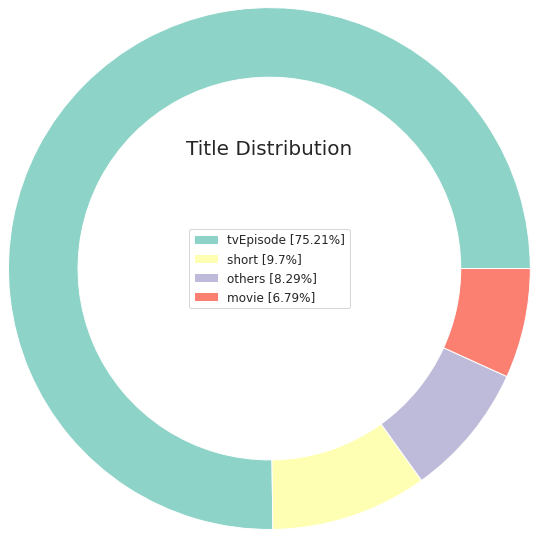

In [164]:
cs = cm.Set3(np.arange(100))
f = plt.figure()

plt.pie(firstResult['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Title Distribution", loc = 'Center', fontdict = {'fontsize':20, 'fontweight':20})
plt.show()

In [165]:
SecondQuery = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''

In [166]:
SecondQuery = pd.read_sql_query(SecondQuery, conn)

In [167]:
display(SecondQuery)

,genres,COUNT(*)
0,Action,14095
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1465,"Thriller,Western",43
1466,War,1300
1467,"War,Western",14
1468,Western,5108


In [168]:
SecondQuery['genres'] = SecondQuery['genres'].str.lower().values

In [169]:
temp = SecondQuery['genres'].dropna()

In [170]:
pattern = '(?u)\\b[\\w-]+\\b'
vector = CountVectorizer(token_pattern = pattern, analyzer = 'word').fit(temp)

In [171]:
type(vector)

sklearn.feature_extraction.text.CountVectorizer

In [172]:
bag_generos = vector.transform(temp)

In [173]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [174]:
generos_unicos = vector.get_feature_names()

In [175]:
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [176]:
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1470 non-null   int64
 1   adult        1470 non-null   int64
 2   adventure    1470 non-null   int64
 3   animation    1470 non-null   int64
 4   biography    1470 non-null   int64
 5   comedy       1470 non-null   int64
 6   crime        1470 non-null   int64
 7   documentary  1470 non-null   int64
 8   drama        1470 non-null   int64
 9   family       1470 non-null   int64
 10  fantasy      1470 non-null   int64
 11  film-noir    1470 non-null   int64
 12  game-show    1470 non-null   int64
 13  history      1470 non-null   int64
 14  horror       1470 non-null   int64
 15  music        1470 non-null   int64
 16  musical      1470 non-null   int64
 17  mystery      1470 non-null   int64
 18  n            1470 non-null   int64
 19  news         1470 non-null   int64
 20  reality-

In [177]:
generos = generos.drop(columns = 'n', axis = 0)

In [178]:
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [179]:
generos_percentual.head(10)

drama          17.891156
comedy         16.938776
documentary    15.782313
adventure      14.897959
action         14.557823
romance        13.265306
crime          12.993197
mystery        12.380952
thriller       12.312925
horror         12.176871
dtype: float64

Text(0.5, 1.0, '\n Number of Titles by Genres\n')

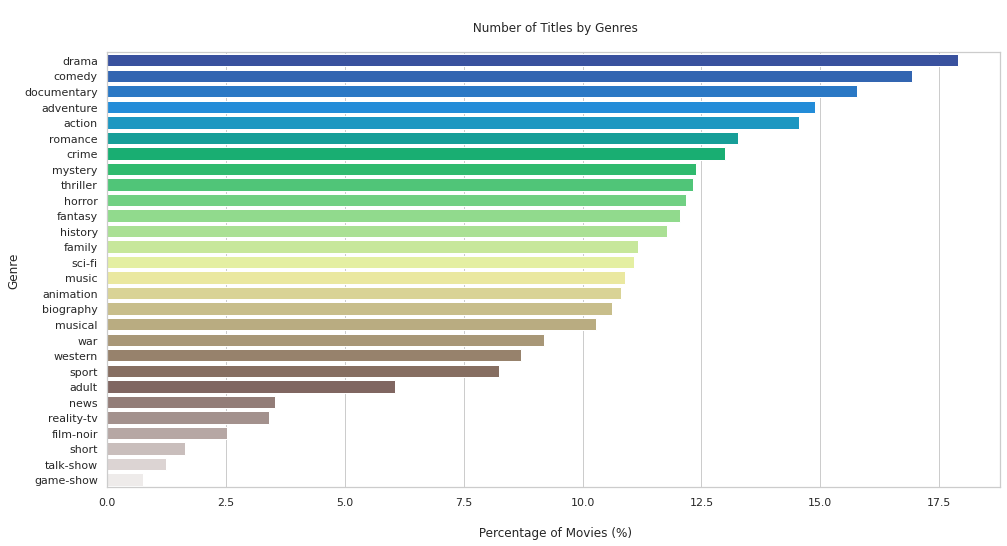

In [180]:
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = 'h', palette = 'terrain')
plt.ylabel('Genre')
plt.xlabel('\n Percentage of Movies (%)')
plt.title('\n Number of Titles by Genres\n')


In [181]:
ThirdQuery = '''SELECT rating, genres FROM
                ratings JOIN titles ON ratings.title_id = titles.title_id 
                WHERE premiered <= 2022 AND type ='movie'
                '''

In [182]:
ThirdQuery = pd.read_sql_query(ThirdQuery, conn)

In [183]:
display(ThirdQuery)

,rating,genres
0,4.5,\N
1,6.0,"Action,Adventure,Biography"
2,4.7,Drama
3,4.5,Drama
4,3.9,Drama
...,...,...
280472,5.8,Thriller
280473,6.4,"Drama,History"
280474,3.8,"Adventure,History,War"
280475,8.3,Drama


In [184]:
def return_genres(df):
  df['genres'] = df['genres'].str.lower().values
  temp = df['genres'].dropna()
  vector = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
  generos_unicos = vector.get_feature_names()
  generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
  return generos_unicos

In [185]:
generos_unicos = return_genres(ThirdQuery)

In [186]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [187]:
genero_counts = []
genero_ratings = []

In [188]:
for item in generos_unicos:
  consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres like'+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
  resultado = pd.read_sql_query(consulta, conn)
  genero_counts.append(resultado.values[0][0])

  consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres like'+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
  resultado = pd.read_sql_query(consulta, conn)
  genero_ratings.append(np.median(resultado['rating']))

In [189]:
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [190]:
df_genero_ratings.head(20)

,genres,count,rating
0,action,29093,5.80
1,adult,4393,5.80
2,adventure,17609,6.00
3,animation,4815,6.50
4,biography,8557,7.00
5,comedy,69284,6.00
6,crime,23982,6.10
7,documentary,42051,7.30
8,drama,124185,6.30
9,family,10826,6.30


In [191]:
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [192]:
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

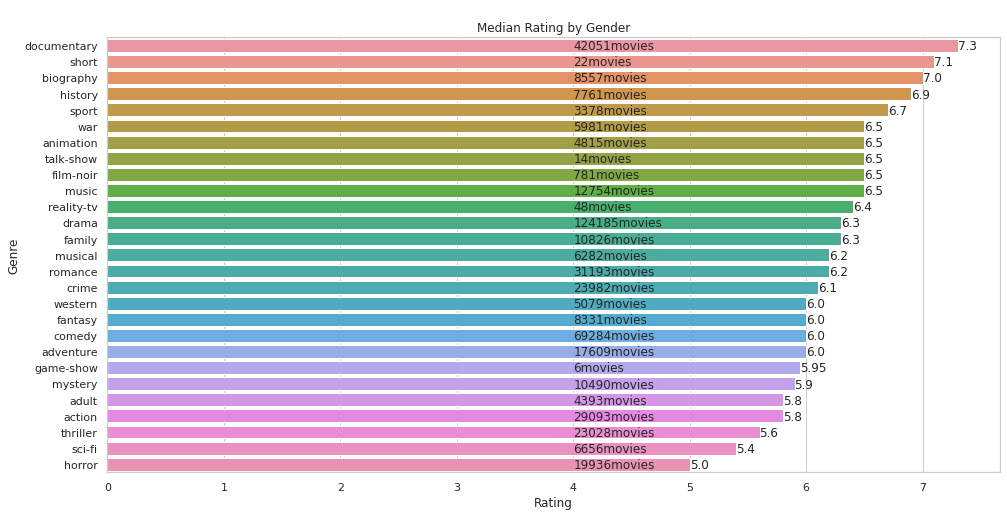

In [193]:
plt.figure(figsize = (16,8))

sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")


for i in range(len(df_genero_ratings.index)):

  plt.text(4.0, 
           i + 0.25,
           str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + "movies")
  plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
           i + 0.25,
           round(df_genero_ratings['rating'][df_genero_ratings.index[i]], 2))
  
plt.ylabel('Genre')
plt.xlabel('Rating')
plt.title('\nMedian Rating by Gender')
plt.show()


In [194]:
ForthQuery = '''SELECT rating AS Rating,premiered FROM
                ratings JOIN titles ON ratings.title_id = titles.title_id 
                WHERE premiered <= 2022 AND type ='movie'
                ORDER BY premiered
                '''

In [195]:
ForthQuery = pd.read_sql_query(ForthQuery, conn)

In [196]:
display(ForthQuery)

,Rating,premiered
0,6.7,1896
1,4.5,1897
2,4.0,1899
3,3.7,1899
4,6.0,1900
...,...,...
280472,9.5,2022
280473,7.8,2022
280474,6.8,2022
280475,5.0,2022


In [197]:
ratings = []
for year in set(ForthQuery['premiered']):
  ratings.append(np.median(ForthQuery[ForthQuery['premiered'] == year]['Rating']))

In [198]:
type(ratings)

list

In [199]:
ratings[1:10]

[4.5, 3.85, 5.85, 6.2, 3.4, 4.6, 5.3, 4.55, 3.6]

In [200]:
years = list(set(ForthQuery['premiered']))

In [201]:
years[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

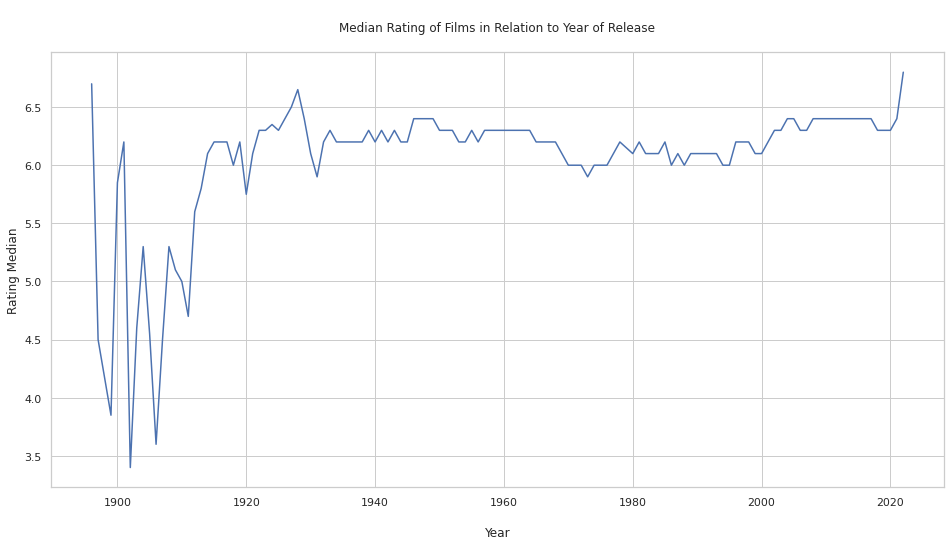

In [202]:
plt.figure(figsize = (16,8))
plt.plot(years, ratings)
plt.xlabel('\nYear')
plt.ylabel('Rating Median')
plt.title('\nMedian Rating of Films in Relation to Year of Release\n')
plt.show()

In [203]:
FifthQuery = '''SELECT genres FROM titles '''

In [204]:
FifthQuery = pd.read_sql_query(FifthQuery, conn)

In [205]:
display(FifthQuery)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9052774,"Action,Drama,Family"
9052775,"Action,Drama,Family"
9052776,"Action,Drama,Family"
9052777,Short


In [206]:
generos_unicos = return_genres(FifthQuery)

In [207]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [208]:
genero_count = []
for item in generos_unicos:
  consulta = 'SELECT COUNT(*) COUNT FROM titles WHERE genres LIKE'+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
  resultado = pd.read_sql_query(consulta, conn)
  genero_count.append(resultado['COUNT'].values[0])

In [209]:
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [210]:
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

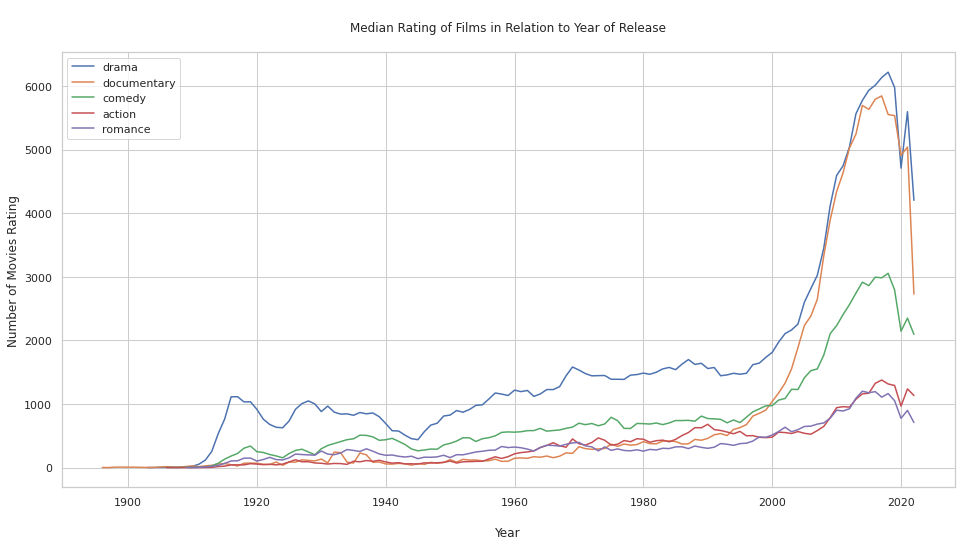

In [211]:
plt.figure(figsize = (16,8))

for item in top_generos:
  consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
  resultado = pd.read_sql_query(consulta, conn)
  plt.plot(resultado['Year'],resultado['Number_of_movies'])

plt.xlabel('\nYear')
plt.ylabel('Number of Movies Rating')
plt.title('\nMedian Rating of Films in Relation to Year of Release\n')
plt.legend(labels = top_generos)
plt.show()

In [212]:
SixthQuery = '''
             SELECT runtime_minutes Runtime
             FROM titles
             WHERE type = 'movie' AND Runtime != 'NaN'
             '''

In [213]:
SixthQuery = pd.read_sql_query(SixthQuery, conn)

In [214]:
display(SixthQuery)

,Runtime
0,100
1,70
2,90
3,120
4,58
...,...
387783,123
387784,57
387785,100
387786,116


In [215]:
for i in range(101):
  val = i
  perc = round(np.percentile(SixthQuery['Runtime'].values, val), 2)
  print('{} percentile duration (runtime) is: {}'.format(val, perc))

0 percentile duration (runtime) is: 1.0
1 percentile duration (runtime) is: 45.0
2 percentile duration (runtime) is: 47.0
3 percentile duration (runtime) is: 50.0
4 percentile duration (runtime) is: 50.0
5 percentile duration (runtime) is: 51.0
6 percentile duration (runtime) is: 52.0
7 percentile duration (runtime) is: 53.0
8 percentile duration (runtime) is: 55.0
9 percentile duration (runtime) is: 56.0
10 percentile duration (runtime) is: 57.0
11 percentile duration (runtime) is: 58.0
12 percentile duration (runtime) is: 60.0
13 percentile duration (runtime) is: 60.0
14 percentile duration (runtime) is: 60.0
15 percentile duration (runtime) is: 61.0
16 percentile duration (runtime) is: 62.0
17 percentile duration (runtime) is: 64.0
18 percentile duration (runtime) is: 65.0
19 percentile duration (runtime) is: 67.0
20 percentile duration (runtime) is: 69.0
21 percentile duration (runtime) is: 70.0
22 percentile duration (runtime) is: 70.0
23 percentile duration (runtime) is: 71.0
24 

In [216]:
SixthQuery = '''
             SELECT runtime_minutes Runtime, primary_title
             FROM titles
             WHERE type = 'movie' AND Runtime != 'NaN'
             ORDER BY Runtime DESC
             LIMIT 1
             '''

In [217]:
SixthQuery = pd.read_sql_query(SixthQuery, conn)

In [218]:
SixthQuery

,Runtime,primary_title
0,51420,Logistics


In [219]:
SeventhQuery = '''
             SELECT AVG(runtime_minutes) Runtime, genres
             FROM titles
             WHERE type = 'movie' 
             AND runtime_minutes != 'NaN'
             GROUP BY genres
             '''

In [220]:
SeventhQuery = pd.read_sql_query(SeventhQuery, conn)

In [221]:
generos_unicos = return_genres(SeventhQuery)

In [222]:
genero_runtime =[]
for item in generos_unicos:
  consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
  resultado = pd.read_sql_query(consulta, conn)
  genero_runtime.append(np.median(resultado['Runtime']))

In [223]:
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [224]:
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [225]:
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

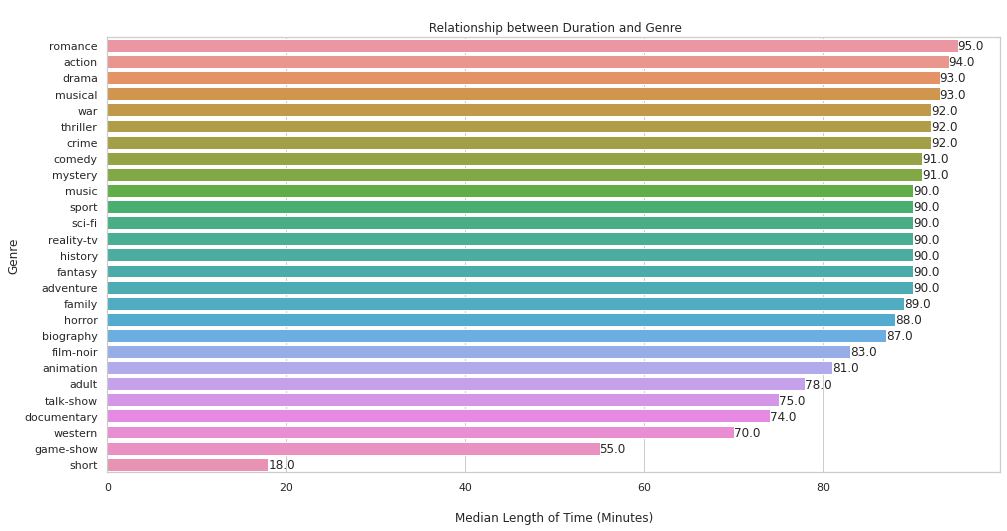

In [226]:
plt.figure(figsize = (16,8))

sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
                 i + 0.25,
                 round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))


plt.xlabel('\nMedian Length of Time (Minutes)')
plt.ylabel('Genre')

plt.title('\n Relationship between Duration and Genre')
plt.show()

In [229]:
EighthQuery = '''
             SELECT region, COUNT(*) Number_of_movies FROM 
             akas JOIN titles ON
             akas.title_id = titles.title_id
             WHERE region != 'None'
             AND type = \'movie\' 
             GROUP BY region
             '''

In [230]:
EighthQuery = pd.read_sql_query(EighthQuery, conn)

In [231]:
display(EighthQuery)

,region,Number_of_movies
0,AD,22
1,AE,6853
2,AF,114
3,AG,12
4,AL,1290
...,...,...
229,YUCS,153
230,ZA,5123
231,ZM,15
232,ZRCD,2


In [232]:
EighthQuery.shape

(234, 2)

In [233]:
EighthQuery.shape[0]

234

In [234]:
countries_name = []
count = []

In [235]:
for i in range(EighthQuery.shape[0]):
  try:
    coun = EighthQuery['region'].values[i]
    countries_name. append(pycountry.countries.get(alpha_2 = coun).name)
    count.append(EighthQuery['Number_of_movies'].values[i])
  except:
    continue

In [236]:
df_movies_countries = pd.DataFrame()
df_movies_countries['country'] = countries_name
df_movies_countries['Movie_Count'] = count

In [237]:
df_movies_countries = df_movies_countries.sort_values(by = 'Movie_Count', ascending = False)

In [238]:
df_movies_countries.head(10)

,country,Movie_Count
199,United States,314577
65,United Kingdom,160674
96,Japan,92114
63,France,85643
89,India,83580
32,Canada,79930
47,Germany,71751
58,Spain,66463
26,Brazil,66120
93,Italy,66088


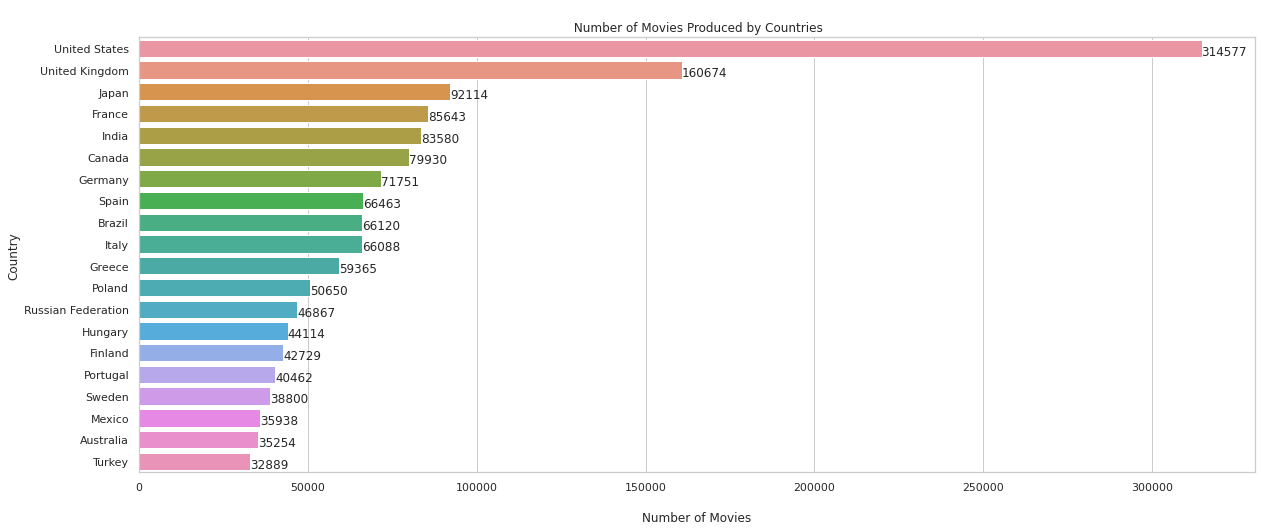

In [241]:
plt.figure(figsize = (20,8))

sns.barplot(y = df_movies_countries[:20].country, x = df_movies_countries[:20].Movie_Count, orient = "h")

for i in range(0,20):
    plt.text(df_movies_countries.Movie_Count[df_movies_countries.index[i]],
                 i + 0.30,
                 round(df_movies_countries["Movie_Count"][df_movies_countries.index[i]], 2))


plt.xlabel('\nNumber of Movies')
plt.ylabel('Country')

plt.title('\n Number of Movies Produced by Countries')
plt.show()

In [243]:
NinthQuery = '''
             SELECT primary_title AS Movie_Name, genres, rating
             FROM 
             titles JOIN ratings
             ON titles.title_id= ratings.title_id
             WHERE titles.type = 'movie' AND ratings.votes >= 25000
             ORDER BY rating DESC 
             LIMIT 10
             '''

In [244]:
NinthQuery = pd.read_sql_query(NinthQuery, conn)

In [245]:
display(NinthQuery)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Chaos Class,"Comedy,Drama",9.3
2,The Godfather,"Crime,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
4,12 Angry Men,"Crime,Drama",9.0
5,The Godfather: Part II,"Crime,Drama",9.0
6,Schindler's List,"Biography,Drama,History",9.0
7,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
8,The Dark Knight,"Action,Crime,Drama",9.0
9,Mirror Game,"Crime,Mystery,Thriller",9.0


In [246]:
TenthQuery = '''
             SELECT primary_title AS Movie_Name, genres, rating
             FROM 
             titles JOIN ratings
             ON titles.title_id= ratings.title_id
             WHERE titles.type = 'movie' AND ratings.votes >= 25000
             ORDER BY rating ASC 
             LIMIT 10
             '''

In [247]:
TenthQuery = pd.read_sql_query(TenthQuery, conn)

In [248]:
display(TenthQuery)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Cumali Ceber,Comedy,1.0
2,Sadak 2,"Action,Drama",1.1
3,Smolensk,"Drama,Thriller",1.2
4,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.5
5,The Cost of Deception,"Crime,Drama,History",1.5
6,Manos: The Hands of Fate,Horror,1.6
7,Justin Bieber: Never Say Never,"Documentary,Music",1.6
8,From Justin to Kelly,"Comedy,Musical,Romance",1.9
9,The Hottie & the Nottie,"Comedy,Romance",1.9
